# MONTE CARLO DROPOUT
Incerteza Epistêmica em Redes Neurais - Gerson Eduardo de Mello 

Esta é uma aplicação do método de incerteza em redes neurais proposto por Yarin Gal. O Dataset escolhido foi O 
Airfoil Self-Noise Data Set (http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise ) retirado do UCL Machine Learn Repository. A variável predita escolhida foi a "Pressure" e todas as demais foram consideradas como variáveis preditoras. 

#Descrição do método proposto por Yarin Gal: 

Em 2015, Yarin Gal mostrou que é possível obter incerteza a partir de redes neurais quase que gratuitamente, se olhássemos técnicas de regularização estocásticas, como Dropout, sob uma perspectiva Bayesiana. Dropout (Srivastava et al, 2014) é uma técnica utilizada na maioria das redes neurais modernas para prevenir sobre-ajustamento. Durante o treinamento, Dropout funciona zerando aleatoriamente uma percentagens de neurônios nas camadas da rede neural. No momento de fazer previsões, todos os neurônios são mantidos e a rede neural atua como uma grande mistura de sub-redes menores.
Durante o treinamento do modelo, nada muda; mas, durante o teste mantemos a probabilidade de Dropout fixada durante o treino e realizamos T  forward-pass pela rede, coletando assim T  previsões y para cada amostra. Assim para cada ponto teremos uma previsão para a média e uma previsão para a variância, que será nossa medida de incerteza.
 

In [1]:
# Importando as bibliotecas necessárias para importação dos datasets

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")


In [10]:
# importando os dados  

In [2]:
df=pd.read_csv('airfoil.csv')

In [3]:
df

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
y=df['Pressure']

In [15]:
X=df[df.columns[0:5]]

In [16]:
X

,Frequency,Angle,Length,Velocity,Suction Side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=32)

In [18]:
X_test

,Frequency,Angle,Length,Velocity,Suction Side
1154,1000,17.4,0.0254,71.3,0.016104
475,2500,0.0,0.1524,55.5,0.001727
458,2000,0.0,0.1524,71.3,0.001599
43,5000,0.0,0.3048,39.6,0.003101
533,2500,2.7,0.1524,39.6,0.002948
...,...,...,...,...,...
1030,500,4.8,0.0254,39.6,0.000907
1106,1600,9.5,0.0254,31.7,0.004614
1282,800,0.0,0.1016,31.7,0.001501
324,2500,4.0,0.2286,55.5,0.004286


In [19]:
y_train

1474    132.158
732     134.430
689     112.209
149     122.088
954     119.174
         ...   
1427    135.674
88      122.101
892     130.430
1334    133.012
727     128.560
Name: Pressure, Length: 1052, dtype: float64

In [20]:
y_test

1154    125.816
475     127.763
458     128.647
43      117.789
533     125.589
         ...   
1030    116.366
1106    131.036
1282    129.053
324     122.384
781     133.598
Name: Pressure, Length: 451, dtype: float64

In [ ]:
#importando bibliotecas para construção da rede neural 

In [21]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

2023-04-23 16:33:50.917922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 16:33:51.172296: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-23 16:33:51.174895: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-23 16:33:51.174907: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [ ]:
#construimos a rede neural

In [32]:
n_input = 5  # numero de entradas das rede neural 
num_out = 1
p_dropout = 0.01 # probabilidade dropout 

lbd = 1e-4  # L2- força de regularização 

model = Sequential()
model.add(Dropout(.03, input_shape=(n_input,)))
model.add(Dense(100, activation='relu', input_shape=(n_input,), kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(num_out, activation=None))
model.summary()

opt = Adam(lr=1e-3) 

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_absolute_error'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 100)               600       
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-trai

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
#treinamos nossa rede por 15000 interações . Cada mini-lote terá 1/5das amostras e assim treinaremos por
# 3000 épocas ou 15000 iterações.

In [34]:
epochs = 3000
model.fit(X_train, y_train,
            batch_size=X_train.shape[0] // 10,
            epochs=epochs,
            verbose=0)

In [ ]:
#Avaliamos a performance do modelo )

In [35]:
from sklearn import metrics

y_hat_train = model.predict(X_train)


33/33 [==============================] - 0s 546us/step


In [36]:
y_hat_test = model.predict(X_test)


15/15 [==============================] - 0s 854us/step


In [37]:
# métricas do treino

In [38]:
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)

In [39]:
MAE_T,R2_T,RMSE_T

(4.222658454517902, 0.3917256079155458, 28.847610541461584)

In [40]:
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)

In [41]:
MAE_t,R2_t,RMSE_t

(4.4862154773788285, 0.29711140458633944, 33.648329708434545)

In [90]:
# elaboração do gráfico ordenando os dados em ordem e plotando os valores reais e predito no conjunto de teste 

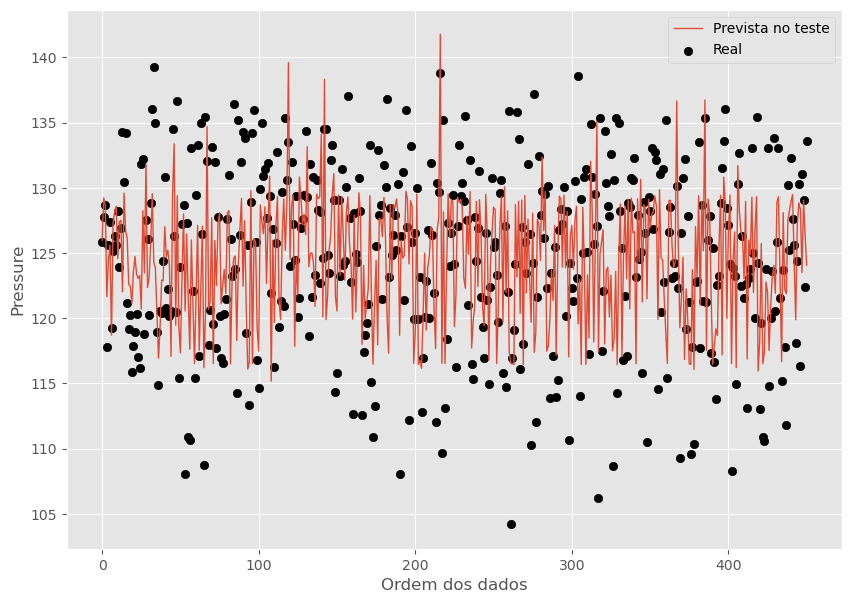

In [42]:
# avaliação conjunto de teste
n = 451
plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

Acima, a previsão é feita da forma tradicional, isto é, colocando a probabilidade de Dropout em 0%, usando assim toda a capacidade da rede. Esse é o padrão do Keras e precisaremos rescrevê-lo para implementar Monte-Carlo Dropout, no qual mantemos as probabilidades de Dropout de treino também durante as previsões. Abaixo, vamos definir uma função que retornará a última camada da rede, (as previsões) dada a camada de entrada (as variáveis). Além disso, vamos definir que está função será usada tal como durante o treinamento, passando K.learning_phase().
Abaixo realizamos 1000 forwad-passes pela rede neural e obtemos 1000 previsões para cada ponto.

In [43]:
import tensorflow as tf
import numpy as np
from keras import backend as K

T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_test]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_test.shape[0]).T

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [44]:
y_hat_mc.shape

(451, 1000)

In [ ]:
# para cada amostra, foram calculados 1000 resultados com base no Dropout . Vamos ver o dataframe :

In [45]:
yhat=pd.DataFrame(y_hat_mc)

In [46]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,127.250854,127.313507,127.250854,127.045235,116.990311,123.882553,127.250854,123.610626,123.697777,111.734940,...,123.491791,127.250854,132.134964,124.802795,127.250854,127.250854,127.250854,127.250854,127.250854,125.361214
1,129.097580,130.469696,127.720764,127.379738,130.464508,123.912666,130.570969,130.784546,130.464508,130.464508,...,130.464508,127.006317,130.464508,130.464508,130.464508,130.464508,129.097580,130.464508,129.719406,127.772049
2,126.686043,129.835083,130.967636,128.214157,129.835083,125.980804,125.819862,129.835083,123.856956,129.835083,...,130.688309,129.835083,126.874527,123.146240,130.627197,129.835083,123.132133,125.666054,129.835083,126.254616
3,118.620277,122.645866,117.089638,122.919868,116.541489,122.645866,121.135162,122.645866,122.645866,120.702782,...,122.645866,122.626259,123.122711,119.537613,122.645866,122.645866,119.864983,121.135162,120.866539,122.645866
4,123.339355,125.498299,124.947823,128.197311,125.498299,125.498299,122.054405,125.498299,120.096558,125.498299,...,125.520851,125.498299,125.498299,122.054405,121.847191,125.498299,125.498299,125.498299,125.498299,123.048523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,129.731522,129.784119,128.593552,126.477402,127.830116,126.778496,129.784119,130.739716,127.261757,132.445740,...,126.164162,129.958221,129.731522,123.836342,129.784119,126.140602,129.784119,129.784119,128.696243,129.784119
447,128.797424,127.605965,124.608238,124.661163,124.608238,120.484917,118.626419,120.567139,124.608238,124.608238,...,124.826355,120.645721,121.901352,124.608238,124.661636,120.946114,124.608238,124.608238,124.661163,119.712540
448,123.638878,130.210770,130.215897,126.984726,130.215897,130.215897,126.984726,130.215897,130.727325,130.215897,...,126.812828,129.508698,128.576859,129.508698,121.628410,126.288635,127.138123,129.440506,130.716614,131.059235
449,127.423309,123.246681,126.570061,127.423309,131.058365,127.423309,124.097023,127.583740,127.423309,124.068321,...,127.423309,123.795647,124.363625,126.000198,127.423309,127.423309,127.423309,127.423309,123.469200,125.143318


In [ ]:
#vamos calcular a média dos 1000 resultados para cada amostra de teste

In [47]:
yhat['mean']=yhat.apply(np.mean,axis=1)

In [48]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,mean
0,127.250854,127.313507,127.250854,127.045235,116.990311,123.882553,127.250854,123.610626,123.697777,111.734940,...,127.250854,132.134964,124.802795,127.250854,127.250854,127.250854,127.250854,127.250854,125.361214,126.017845
1,129.097580,130.469696,127.720764,127.379738,130.464508,123.912666,130.570969,130.784546,130.464508,130.464508,...,127.006317,130.464508,130.464508,130.464508,130.464508,129.097580,130.464508,129.719406,127.772049,129.084167
2,126.686043,129.835083,130.967636,128.214157,129.835083,125.980804,125.819862,129.835083,123.856956,129.835083,...,129.835083,126.874527,123.146240,130.627197,129.835083,123.132133,125.666054,129.835083,126.254616,128.499710
3,118.620277,122.645866,117.089638,122.919868,116.541489,122.645866,121.135162,122.645866,122.645866,120.702782,...,122.626259,123.122711,119.537613,122.645866,122.645866,119.864983,121.135162,120.866539,122.645866,121.358589
4,123.339355,125.498299,124.947823,128.197311,125.498299,125.498299,122.054405,125.498299,120.096558,125.498299,...,125.498299,125.498299,122.054405,121.847191,125.498299,125.498299,125.498299,125.498299,123.048523,124.430367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,129.731522,129.784119,128.593552,126.477402,127.830116,126.778496,129.784119,130.739716,127.261757,132.445740,...,129.958221,129.731522,123.836342,129.784119,126.140602,129.784119,129.784119,128.696243,129.784119,128.479950
447,128.797424,127.605965,124.608238,124.661163,124.608238,120.484917,118.626419,120.567139,124.608238,124.608238,...,120.645721,121.901352,124.608238,124.661636,120.946114,124.608238,124.608238,124.661163,119.712540,123.578247
448,123.638878,130.210770,130.215897,126.984726,130.215897,130.215897,126.984726,130.215897,130.727325,130.215897,...,129.508698,128.576859,129.508698,121.628410,126.288635,127.138123,129.440506,130.716614,131.059235,128.898911
449,127.423309,123.246681,126.570061,127.423309,131.058365,127.423309,124.097023,127.583740,127.423309,124.068321,...,123.795647,124.363625,126.000198,127.423309,127.423309,127.423309,127.423309,123.469200,125.143318,126.097908


In [ ]:
#separamos novamente os 1000 resultados retitrando a coluna média 

In [49]:
yhatd=yhat.iloc[:,0:1000]

In [50]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,127.250854,127.313507,127.250854,127.045235,116.990311,123.882553,127.250854,123.610626,123.697777,111.734940,...,123.491791,127.250854,132.134964,124.802795,127.250854,127.250854,127.250854,127.250854,127.250854,125.361214
1,129.097580,130.469696,127.720764,127.379738,130.464508,123.912666,130.570969,130.784546,130.464508,130.464508,...,130.464508,127.006317,130.464508,130.464508,130.464508,130.464508,129.097580,130.464508,129.719406,127.772049
2,126.686043,129.835083,130.967636,128.214157,129.835083,125.980804,125.819862,129.835083,123.856956,129.835083,...,130.688309,129.835083,126.874527,123.146240,130.627197,129.835083,123.132133,125.666054,129.835083,126.254616
3,118.620277,122.645866,117.089638,122.919868,116.541489,122.645866,121.135162,122.645866,122.645866,120.702782,...,122.645866,122.626259,123.122711,119.537613,122.645866,122.645866,119.864983,121.135162,120.866539,122.645866
4,123.339355,125.498299,124.947823,128.197311,125.498299,125.498299,122.054405,125.498299,120.096558,125.498299,...,125.520851,125.498299,125.498299,122.054405,121.847191,125.498299,125.498299,125.498299,125.498299,123.048523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,129.731522,129.784119,128.593552,126.477402,127.830116,126.778496,129.784119,130.739716,127.261757,132.445740,...,126.164162,129.958221,129.731522,123.836342,129.784119,126.140602,129.784119,129.784119,128.696243,129.784119
447,128.797424,127.605965,124.608238,124.661163,124.608238,120.484917,118.626419,120.567139,124.608238,124.608238,...,124.826355,120.645721,121.901352,124.608238,124.661636,120.946114,124.608238,124.608238,124.661163,119.712540
448,123.638878,130.210770,130.215897,126.984726,130.215897,130.215897,126.984726,130.215897,130.727325,130.215897,...,126.812828,129.508698,128.576859,129.508698,121.628410,126.288635,127.138123,129.440506,130.716614,131.059235
449,127.423309,123.246681,126.570061,127.423309,131.058365,127.423309,124.097023,127.583740,127.423309,124.068321,...,127.423309,123.795647,124.363625,126.000198,127.423309,127.423309,127.423309,127.423309,123.469200,125.143318


In [ ]:
#vamos calcular o desvio padrão dos 1000 resultados dos dados de teste

In [51]:
yhatd['2*std']=yhatd.apply(np.std,axis=1)

In [52]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,2*std
0,127.250854,127.313507,127.250854,127.045235,116.990311,123.882553,127.250854,123.610626,123.697777,111.734940,...,127.250854,132.134964,124.802795,127.250854,127.250854,127.250854,127.250854,127.250854,125.361214,2.315866
1,129.097580,130.469696,127.720764,127.379738,130.464508,123.912666,130.570969,130.784546,130.464508,130.464508,...,127.006317,130.464508,130.464508,130.464508,130.464508,129.097580,130.464508,129.719406,127.772049,2.231850
2,126.686043,129.835083,130.967636,128.214157,129.835083,125.980804,125.819862,129.835083,123.856956,129.835083,...,129.835083,126.874527,123.146240,130.627197,129.835083,123.132133,125.666054,129.835083,126.254616,2.630633
3,118.620277,122.645866,117.089638,122.919868,116.541489,122.645866,121.135162,122.645866,122.645866,120.702782,...,122.626259,123.122711,119.537613,122.645866,122.645866,119.864983,121.135162,120.866539,122.645866,2.402166
4,123.339355,125.498299,124.947823,128.197311,125.498299,125.498299,122.054405,125.498299,120.096558,125.498299,...,125.498299,125.498299,122.054405,121.847191,125.498299,125.498299,125.498299,125.498299,123.048523,2.194185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,129.731522,129.784119,128.593552,126.477402,127.830116,126.778496,129.784119,130.739716,127.261757,132.445740,...,129.958221,129.731522,123.836342,129.784119,126.140602,129.784119,129.784119,128.696243,129.784119,2.290916
447,128.797424,127.605965,124.608238,124.661163,124.608238,120.484917,118.626419,120.567139,124.608238,124.608238,...,120.645721,121.901352,124.608238,124.661636,120.946114,124.608238,124.608238,124.661163,119.712540,2.264421
448,123.638878,130.210770,130.215897,126.984726,130.215897,130.215897,126.984726,130.215897,130.727325,130.215897,...,129.508698,128.576859,129.508698,121.628410,126.288635,127.138123,129.440506,130.716614,131.059235,2.149521
449,127.423309,123.246681,126.570061,127.423309,131.058365,127.423309,124.097023,127.583740,127.423309,124.068321,...,123.795647,124.363625,126.000198,127.423309,127.423309,127.423309,127.423309,123.469200,125.143318,2.300721


In [73]:
#Abaixo os valores reais para y do conjunto de teste

In [53]:
y_test=pd.DataFrame(y_test)

In [54]:
y_test

,Pressure
1154,125.816
475,127.763
458,128.647
43,117.789
533,125.589
...,...
1030,116.366
1106,131.036
1282,129.053
324,122.384


In [77]:
#resetando o índice 

In [55]:
y_test=y_test.reset_index(drop=True)

In [56]:
y_test

,Pressure
0,125.816
1,127.763
2,128.647
3,117.789
4,125.589
...,...
446,116.366
447,131.036
448,129.053
449,122.384


In [80]:
#retirado a coluna 0

In [57]:
mean=yhat.iloc[:,1000]

In [58]:
mean=pd.DataFrame(mean)

In [59]:
mean

,mean
0,126.017845
1,129.084167
2,128.499710
3,121.358589
4,124.430367
...,...
446,128.479950
447,123.578247
448,128.898911
449,126.097908


In [60]:
desvpad=yhatd.iloc[:,1000]

In [61]:
desvpad=2*pd.DataFrame(desvpad)

In [62]:
desvpad

,2*std
0,4.631731
1,4.463700
2,5.261267
3,4.804332
4,4.388370
...,...
446,4.581831
447,4.528841
448,4.299042
449,4.601442


In [ ]:
#colocar tudo em uma tabela

In [63]:
df.resume=pd.concat([y_test,mean,desvpad],axis=1)

/tmp/ipykernel_10433/1750862409.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume=pd.concat([y_test,mean,desvpad],axis=1)


In [64]:
df.resume

,Pressure,mean,2*std
0,125.816,126.017845,4.631731
1,127.763,129.084167,4.463700
2,128.647,128.499710,5.261267
3,117.789,121.358589,4.804332
4,125.589,124.430367,4.388370
...,...,...,...
446,116.366,128.479950,4.581831
447,131.036,123.578247,4.528841
448,129.053,128.898911,4.299042
449,122.384,126.097908,4.601442


In [66]:
df.resume['Ulow']=df.resume['mean']-df.resume['2*std']

In [68]:
df.resume['Uup']=df.resume['mean'] + df.resume['2*std']

In [69]:
df.resume

,Pressure,mean,2*std,Ulow,Uup
0,125.816,126.017845,4.631731,121.386114,130.649576
1,127.763,129.084167,4.463700,124.620468,133.547867
2,128.647,128.499710,5.261267,123.238443,133.760977
3,117.789,121.358589,4.804332,116.554257,126.162921
4,125.589,124.430367,4.388370,120.041996,128.818737
...,...,...,...,...,...
446,116.366,128.479950,4.581831,123.898118,133.061781
447,131.036,123.578247,4.528841,119.049406,128.107088
448,129.053,128.898911,4.299042,124.599868,133.197953
449,122.384,126.097908,4.601442,121.496466,130.699350


In [70]:
    df.resume.rename(columns={'Pressure ':'y_real'},inplace=True)  

In [71]:
df.resume

,Pressure,mean,2*std,Ulow,Uup
0,125.816,126.017845,4.631731,121.386114,130.649576
1,127.763,129.084167,4.463700,124.620468,133.547867
2,128.647,128.499710,5.261267,123.238443,133.760977
3,117.789,121.358589,4.804332,116.554257,126.162921
4,125.589,124.430367,4.388370,120.041996,128.818737
...,...,...,...,...,...
446,116.366,128.479950,4.581831,123.898118,133.061781
447,131.036,123.578247,4.528841,119.049406,128.107088
448,129.053,128.898911,4.299042,124.599868,133.197953
449,122.384,126.097908,4.601442,121.496466,130.699350


In [72]:
df.resume['status']=""

In [73]:
df.resume

,Pressure,mean,2*std,Ulow,Uup,status
0,125.816,126.017845,4.631731,121.386114,130.649576,
1,127.763,129.084167,4.463700,124.620468,133.547867,
2,128.647,128.499710,5.261267,123.238443,133.760977,
3,117.789,121.358589,4.804332,116.554257,126.162921,
4,125.589,124.430367,4.388370,120.041996,128.818737,
...,...,...,...,...,...,...
446,116.366,128.479950,4.581831,123.898118,133.061781,
447,131.036,123.578247,4.528841,119.049406,128.107088,
448,129.053,128.898911,4.299042,124.599868,133.197953,
449,122.384,126.097908,4.601442,121.496466,130.699350,


In [74]:
df.resume.to_csv('df.resume.csv')

In [ ]:
#verificar um valor predito : média e desvio padrão 

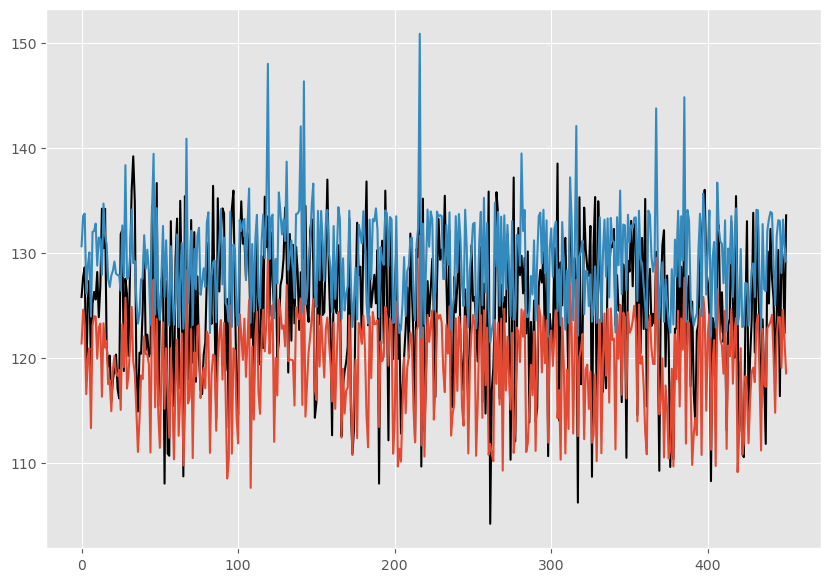

In [76]:
plt.style.use("ggplot")
plt.figure(figsize=(10,7))
plt.plot(df.resume['Pressure'],color='black')
plt.plot(df.resume['Ulow'])
plt.plot(df.resume['Uup'])






plt.show()

In [77]:
yt=np.array(y_test)

In [78]:
yt[0]

array([125.816])

In [79]:
np.mean(y_hat_mc[0])

126.01822

In [80]:
np.sqrt(np.var(y_hat_mc[0]))

2.315863

In [ ]:
#Computamos média e variância para cada ponto no set de teste.

In [81]:
l = 10
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 

In [82]:
metrics.mean_absolute_error(y_test, y_hat_test_mean)

4.469915857962124

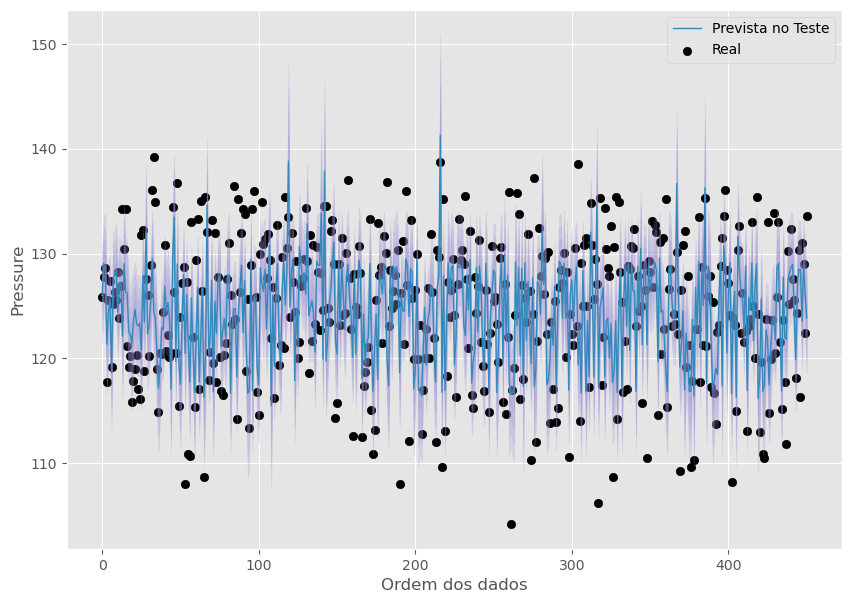

In [84]:
n = 451
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

In [85]:
T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_train]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_train.shape[0]).T

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [86]:
l = 10
y_hat_train_mean = np.mean(y_hat_mc, axis=1)
y_hat_train_variance = np.var(y_hat_mc, axis=1)
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_train_variance += tau**-1

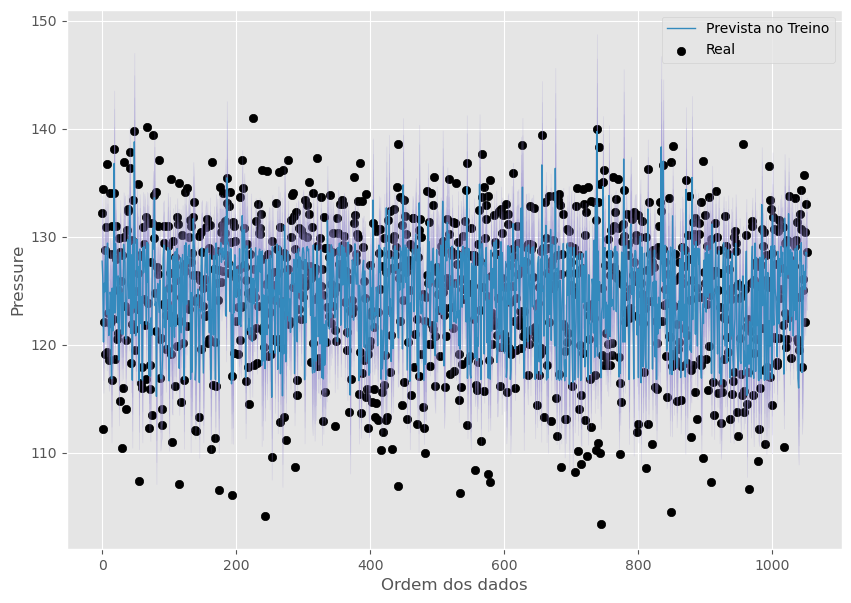

In [89]:
n = 1052
t = range(n) 
mu = y_hat_train_mean
sigma = np.sqrt(y_hat_train_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Treino", color="C1", lw=1)
plt.scatter(t, y_train, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2") # 90% IC

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_train.png")
plt.show()